# Анализ базы данных сервиса для чтения книг

**Цель проекта:**

  - Целью проекта является проведение анализа данных сервиса для чтения книг, для получения информации о пользователях и продукте.

**Задачи:**

1. Посчитать, сколько книг вышло после 1 января 2000 года;

2. Для каждой книги посчитать количество обзоров и среднюю оценку;

3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц, исключив таким образом из анализа брошюры;

4. Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;

5. Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Описание данных

В этом описании представлены пять таблиц, которые составляют основу исходных данных:

---

***1. Таблица books***

Эта таблица содержит информацию о книгах:
  
  – `book_id` — уникальный идентификатор каждой книги;
  
  – `author_id` — идентификатор автора;
  
  – `title` — название книги;
  
  – `num_pages` — количество страниц;
  
  – `publication_date` — дата публикации;
  
  – `publisher_id` — уникальный идентификатор издательства.

---

***2. Таблица authors***

В этой таблице хранятся данные об авторах:

  – `author_id` — идентификатор автора;
  
  – `author` — имя автора.

---

***3. Таблица publishers***

Эта таблица содержит информацию об издательствах:

  – `publisher_id` — идентификатор издательства;
  
  – `publisher` — название издательства.

---

***4. Таблица ratings***

В этой таблице собраны пользовательские оценки книг:

  – `book_id` — идентификатор книги;
  
  – `username` — имя пользователя, оставившего оценку;
  
  – `rating` — оценка книги.

---

***5. Таблица reviews***

Эта таблица хранит пользовательские обзоры на книги:

  – `review_id` — идентификатор обзора;
  
  – `book_id` — идентификатор книги;
  
  – `username` — имя пользователя, написавшего обзор;
  
  – `text` — текст обзора.

# Схема данных

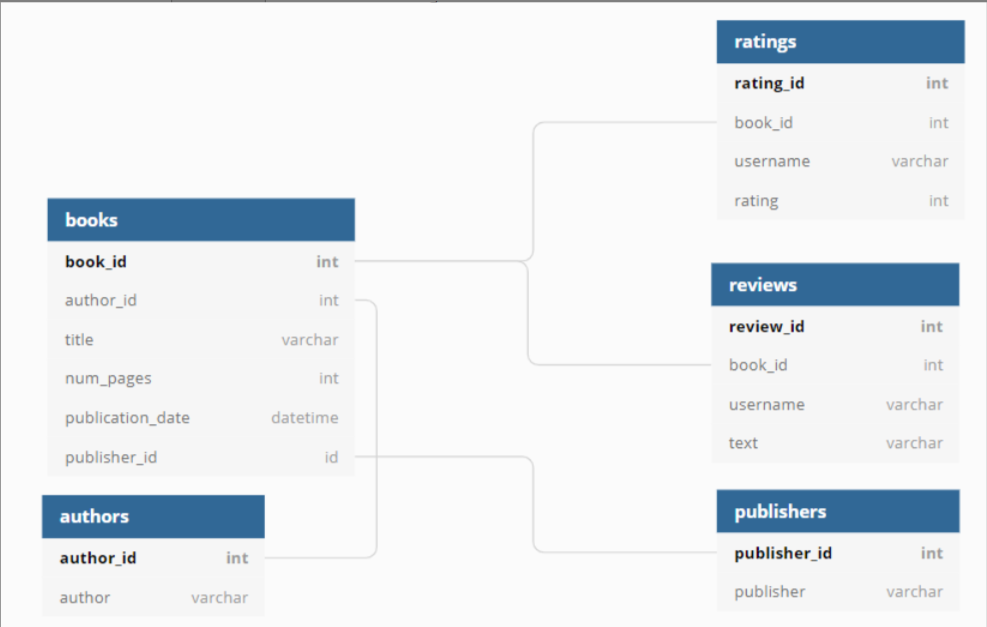

**План проекта:**

1. Подключение к базе данных.


2. Загрузка данных. Исследование таблиц.


3. Выполнение задач.


4. Выводы.

# 1. Подключение к базе данных

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

# устанавливаем параметры
db_config = {
'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

# 2. Загрузка данных. Исследование таблиц

In [2]:
# функция для выполнения SQL-запроса

def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    """
    Открываем соединение, получаем данные из sql, закрываем соединение
    """

    with engine.connect() as con:

        return pd.read_sql(sql=sa.text(query), con = con)

# Таблица books

In [3]:
query_1 = '''
SELECT * 
FROM books 
LIMIT 5
'''
query_2 = '''
SELECT count(*) 
FROM books 
'''

display(get_sql_data(query_1))
count_df = get_sql_data(query_2)
count_value = count_df.iloc[0, 0] 
print('\033[1m' + 'Количество записей в таблице:' + '\033[0m', count_value)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Количество записей в таблице: 1000


- таблица books содержит информацию о книгах;

- поле book_id является первичным ключом;

- таблица имеет связь с другими таблицами по полям author_id и publisher_id;

- таблица содержит информацию о количестве страниц (num_pages) в книгах и информацию о дате публикации (publication_date) книг;

- количество записей в таблице:1000.

# Таблица authors

In [4]:
query_1 = '''
SELECT * 
FROM authors 
LIMIT 5
'''
query_2 = '''
SELECT count(*) 
FROM authors 
'''

display(get_sql_data(query_1))
count_df = get_sql_data(query_2)
count_value = count_df.iloc[0, 0] # Извлекаем значение из DataFrame
print('\033[1m' + 'Количество записей в таблице:' + '\033[0m', count_value)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Количество записей в таблице: 636


- таблица authors содержит данные об авторах книг;

- поле author_id является первичным ключом;

- таблица authors связана с таблицей books по полю author_id;

- количество записей в таблице: 636.

# Таблица publishers

In [5]:
query_1 = '''
SELECT * 
FROM publishers 
LIMIT 5
'''
query_2 = '''
SELECT count(*) 
FROM publishers 
'''

display(get_sql_data(query_1))
count_df = get_sql_data(query_2)
count_value = count_df.iloc[0, 0] 
print('\033[1m' + 'Количество записей в таблице:' + '\033[0m', count_value)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Количество записей в таблице: 340


- таблица publishers содержит данные об издательствах;

- поле publisher_id является первичным ключом;

- таблица publishers связана с таблицей books по полю publisher_id;

- количество записей в таблице: 340.

# Таблица ratings

In [6]:
query_1 = '''
SELECT * 
FROM ratings 
LIMIT 5
'''
query_2 = '''
SELECT count(*) 
FROM ratings
'''

display(get_sql_data(query_1))
count_df = get_sql_data(query_2)
count_value = count_df.iloc[0, 0] 
print('\033[1m' + 'Количество записей в таблице:' + '\033[0m', count_value)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Количество записей в таблице: 6456


- таблица ratings содержит данные о пользовательских оценках книг;

- поле rating_id является первичным ключом;

- таблица ratings связана с таблицами books и reviews по полю book_id, являющимся внешним ключом;

- таблица содержит информацию о имени пользователя (username), оставившего оценку и оценки книги (rating);

- количество записей в таблице: 6456.

# Таблица reviews

In [7]:
query_1 = '''
SELECT * 
FROM reviews 
LIMIT 5
'''
query_2 = '''
SELECT count(*) 
FROM reviews 
'''

display(get_sql_data(query_1))
count_df = get_sql_data(query_2)
count_value = count_df.iloc[0, 0] 
print('\033[1m' + 'Количество записей в таблице:' + '\033[0m', count_value)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Количество записей в таблице: 2793


- таблица reviews содержит информацию об отзывах пользователей на книги;

- поле review_id является первичным ключом;

- таблица reviews связана с таблицами books и ratings по полю book_id, являющимся внешним ключом;

- таблица содержит имя пользователя (username), оставившего отзыв и текста обзора (text);

- количество записей в таблице: 2793.

# 3. Выполнение задач

# Посчитать, сколько книг вышло после 1 января 2000 года

In [8]:
query = """
   SELECT COUNT(*)
   FROM books
   WHERE publication_date > '2000-01-01';
 """

count_df = get_sql_data(query)
count_value = count_df.iloc[0,0]
print('\033[1m' + 'Количество книг, выпущенных после 1 января 2000 года:' + '\033[0m', count_value)

Количество книг, выпущенных после 1 января 2000 года: 819


- По результатам запроса, в таблице books содержится 819 книг, выпущенных после 1 января 2000 года.

# Для каждой книги посчитать количество обзоров и среднюю оценку

In [9]:
query = """
SELECT
    b.book_id,
    b.title,
    (SELECT COUNT(review_id) FROM reviews WHERE book_id = b.book_id) AS num_reviews,
    (SELECT AVG(rating) FROM ratings WHERE book_id = b.book_id) AS avg_rating
FROM
    books b
ORDER BY
    b.book_id;
"""

result_df = get_sql_data(query)
display(result_df)

,book_id,title,num_reviews,avg_rating
0,1,'Salem's Lot,2,3.666667
1,2,1 000 Places to See Before You Die,1,2.500000
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.666667
3,4,1491: New Revelations of the Americas Before C...,2,4.500000
4,5,1776,4,4.000000
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.666667
996,997,Xenocide (Ender's Saga #3),3,3.400000
997,998,Year of Wonders,4,3.200000
998,999,You Suck (A Love Story #2),2,4.500000


- С помощью SQL запроса для каждой книги была получена информация о:
    - количестве обзоров на нее;
    - среднем пользовательском рейтинге книги.

# Определить издательство, которое выпустило наибольшее число книг толще 50 страниц, исключив таким образом из анализа брошюры

In [10]:
query = '''
SELECT
    p.publisher,
    COUNT(b.book_id) AS num_books
FROM
    books b
JOIN
    publishers p ON b.publisher_id = p.publisher_id
WHERE
    b.num_pages > 50
GROUP BY
    p.publisher
ORDER BY
    num_books DESC
LIMIT 1;
'''

result_df = get_sql_data(query)
result_1 = result_df.iloc[0, 0] 
result_2 = result_df.iloc[0, 1]
print('\033[1m' + 'Издательство, которое выпустило наибольшее число книг толще 50 страниц:' + '\033[0m', result_1)
print('\033[1m' + 'Количество книг:' + '\033[0m', result_2)

Издательство, которое выпустило наибольшее число книг толще 50 страниц: Penguin Books
Количество книг: 42


- Согласно результатам SQL-запроса, исключив брошюры, издательство Penguin Books выпустило наибольшее количество книг толще 50 страниц;

- Количество выпущенных книг равно 42.

# Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками

In [11]:
query = '''
SELECT author, AVG(rating) as rating
   FROM books as b
RIGHT JOIN (SELECT book_id
          FROM ratings
    GROUP BY book_id 
    HAVING count(rating_id)>=50) as p ON b.book_id=p.book_id
LEFT JOIN authors a ON b.author_id = a.author_id
LEFT JOIN ratings r ON r.book_id = b.book_id
    GROUP BY author
    ORDER BY rating DESC LIMIT 1   
'''


result_df = get_sql_data(query)
result_1 = result_df.iloc[0, 0]
result_2 = result_df.iloc[0, 1]
print('\033[1m' + 'Автор с самой высокой средней оценкой книг:' + '\033[0m', result_1)
print('\033[1m' + 'Средний рейтинг:' + '\033[0m', result_2.round(2))

Автор с самой высокой средней оценкой книг: J.K. Rowling/Mary GrandPré
Средний рейтинг: 4.29


- Согласно результатам SQL-запроса, учитывая только книги с 50 и более оценками, автор с самой высокой средней оценкой книг: J.K. Rowling/Mary GrandPré;

- Средний рейтинг книг равен 4,29.

# Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [12]:
query = '''
WITH active_users AS (
  SELECT
      username
  FROM
      ratings
  GROUP BY
      username
  HAVING
      COUNT(*) > 48
),
user_reviews AS (
  SELECT
        r.username,
        COUNT(r.review_id) AS num_reviews
  FROM reviews r
  JOIN active_users au ON au.username = r.username
    GROUP BY
        r.username
)
SELECT
    AVG(num_reviews) AS avg_num_reviews
FROM
   user_reviews;
'''

result_df = get_sql_data(query)
result = result_df.iloc[0, 0]
print('\033[1m' + 'Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок:' + '\033[0m', result)

Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок: 24.0


- Согласно результатам SQL-запроса, среднее количество обзоров от пользователей, которые поставили более 48 оценок, составляет 24.0

# 4. Выводы

**В данном исследовании проводился анализ данных сервиса для чтения книг с целью изучения структуры данных и получения полезной информации о книгах, авторах, издательствах, оценках и отзывах пользователей.**

---
***1. Исследование таблиц:***


**В ходе исследования были проанализированы следующие таблицы:**


- `Таблица books`

   - таблица books содержит информацию о книгах;

   - поле book_id является первичным ключом;

   - таблица имеет связь с другими таблицами по полям author_id и publisher_id;

   - таблица содержит информацию о количестве страниц (num_pages) в книгах и информацию о дате публикации (publication_date) книг;

   - количество записей в таблице:1000.
   
- `Таблица authors`

   - таблица authors содержит данные об авторах книг;

   - поле author_id является первичным ключом;

   - таблица authors связана с таблицей books по полю author_id;

   - количество записей в таблице: 636.
   
   
- `Таблица publishers`

   - таблица publishers содержит данные об издательствах;

   - поле publisher_id является первичным ключом;

   - таблица publishers связана с таблицей books по полю publisher_id;

   - количество записей в таблице: 340.

- `Таблица ratings`

   - таблица ratings содержит данные о пользовательских оценках книг;

   - поле rating_id является первичным ключом;

   - таблица ratings связана с таблицами books и reviews по полю book_id, являющимся внешним ключом;

   - таблица содержит информацию о имени пользователя (username), оставившего оценку и оценки книги (rating);

   - количество записей в таблице: 6456.
   
- `Таблица reviews`

   - таблица reviews содержит информацию об отзывах пользователей на книги;

   - поле review_id является первичным ключом;

   - таблица reviews связана с таблицами books и ratings по полю book_id, являющимся внешним ключом;

   - таблица содержит имя пользователя (username), оставившего отзыв и текста обзора (text);

   - количество записей в таблице: 2793.
   
   
---
***2. Выполнение задач:***

- `Посчитать, сколько книг вышло после 1 января 2000 года`

  - По результатам запроса, в таблице books содержится 819 книг, выпущенных после 1 января 2000 года.
  
  
- `Для каждой книги посчитать количество обзоров и среднюю оценку`

   - С помощью SQL запроса для каждой книги была получена информация о количестве обзоров на нее и среднем пользовательском рейтинге книги.
   

- ` Определить издательство, которое выпустило наибольшее число книг толще 50 страниц, исключив таким образом из анализа брошюры`

   - Согласно результатам SQL-запроса, исключив брошюры, издательство Penguin Books выпустило наибольшее количество книг толще 50 страниц. Количество выпущенных книг равно 42


- ` Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками`

   - Согласно результатам SQL-запроса, учитывая только книги с 50 и более оценками, автор с самой высокой средней оценкой книг: J.K. Rowling/Mary GrandPré. Средний рейтинг книг равен 4,29.


- ` Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок`

   - Согласно результатам SQL-запроса, среднее количество обзоров от пользователей, которые поставили более 48 оценок, составляет 24.0.